In [1]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon


import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [2]:


point = Point(0.5, 0.5)
polygon = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])
print(polygon.contains(point))

True


In [3]:
boardHeight = 10
boardWidth = 10
gridStep = 0.1
shapeIdList = [1,2,3,4,5,6,7]

In [4]:
jsoninfo = {"MoveShapeSequence":[7,6,3,4,5,3,2,3,6,4,2,7,5,1],"SevenShapeInfo":[{"shapeId":1,"shapeType":0,"rotationType":0,"shapePosition":{"x":-2.6000001430511476,"y":-1.5},"shapePositionIds":{"x":-26.0,"y":-15.0},"shapeRotation":{"x":45.00001525878906,"y":270.0,"z":90.0},"shapeRotationId":6},{"shapeId":2,"shapeType":0,"rotationType":0,"shapePosition":{"x":2.5,"y":0.800000011920929},"shapePositionIds":{"x":25.0,"y":8.0},"shapeRotation":{"x":45.00001907348633,"y":90.0,"z":270.0},"shapeRotationId":0},{"shapeId":3,"shapeType":3,"rotationType":0,"shapePosition":{"x":2.5,"y":2.9000000953674318},"shapePositionIds":{"x":25.0,"y":29.0},"shapeRotation":{"x":314.9999694824219,"y":90.0,"z":90.0},"shapeRotationId":0},{"shapeId":4,"shapeType":4,"rotationType":0,"shapePosition":{"x":3.0,"y":-0.699999988079071},"shapePositionIds":{"x":30.0,"y":-7.0},"shapeRotation":{"x":45.000022888183597,"y":270.0,"z":270.0},"shapeRotationId":0},{"shapeId":5,"shapeType":1,"rotationType":0,"shapePosition":{"x":-1.6000001430511475,"y":-0.4000000059604645},"shapePositionIds":{"x":-16.0,"y":-4.0},"shapeRotation":{"x":-0.000020490568203967996,"y":90.00001525878906,"z":90.0},"shapeRotationId":3},{"shapeId":6,"shapeType":2,"rotationType":0,"shapePosition":{"x":2.4000000953674318,"y":-0.20000000298023225},"shapePositionIds":{"x":24.0,"y":-2.0},"shapeRotation":{"x":45.00001525878906,"y":270.0,"z":270.0},"shapeRotationId":12},{"shapeId":7,"shapeType":2,"rotationType":0,"shapePosition":{"x":0.8999999761581421,"y":-0.800000011920929},"shapePositionIds":{"x":9.0,"y":-8.0},"shapeRotation":{"x":-0.000010245284101983998,"y":270.0,"z":90.0},"shapeRotationId":9}]}

In [5]:
moveSequence = jsoninfo["MoveShapeSequence"]
sevenShapeInfo = jsoninfo["SevenShapeInfo"]

In [6]:
placeSequence = []
for element in moveSequence[::-1]:
    if element in placeSequence:
        continue
    placeSequence.append(element)

for shapeId in shapeIdList:
    if not shapeId in placeSequence:
        placeSequence.append(shapeId)

In [7]:
placeSequence

[1, 5, 7, 2, 4, 6, 3]

In [95]:
shapeInfo = sevenShapeInfo[3]

In [96]:
shapeInfo

{'shapeId': 4,
 'shapeType': 4,
 'rotationType': 0,
 'shapePosition': {'x': 3.0, 'y': -0.699999988079071},
 'shapePositionIds': {'x': 30.0, 'y': -7.0},
 'shapeRotation': {'x': 45.000022888183594, 'y': 270.0, 'z': 270.0},
 'shapeRotationId': 0}

In [80]:
image = np.ones((100, 100, 3), np.uint8) * 255

In [74]:
# pt1 = (15, 10)
# pt2 = (10, 20)
# pt3 = (20, 20)

# triangle_cnt = np.array( [pt1, pt2, pt3] )

#cv2.drawContours(image, [triangle_cnt], 0, (0,0,0), -1)

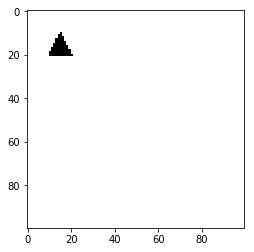

In [52]:
plt.imshow(image)

In [59]:
def TriangleVertexPosition(shapePositionIds, shapeRotationId, edgeLength = 10):
    '''
    Draw triangle vertex positions
    '''
    center_x = shapePositionIds["x"] + boardWidth/gridStep/2
    center_y = -shapePositionIds["y"] + boardHeight/gridStep/2
    
    rotationAngle = np.pi/12 * shapeRotationId
    
    vertex_0_x = edgeLength * np.cos(rotationAngle)
    vertex_0_y = edgeLength * np.sin(rotationAngle)
    point_0 = ((int)(center_x + vertex_0_x), (int)(center_y + vertex_0_y))
    
    vertex_1_x = edgeLength * np.cos(rotationAngle - np.pi/2)
    vertex_1_y = edgeLength * np.sin(rotationAngle - np.pi/2)
    point_1= ((int)(center_x + vertex_1_x), (int)(center_y + vertex_1_y))
    
    vertex_2_x = edgeLength * np.cos(rotationAngle + np.pi/2)
    vertex_2_y = edgeLength * np.sin(rotationAngle + np.pi/2)
    point_2 = ((int)(center_x + vertex_2_x), (int)(center_y + vertex_2_y))
    
    return np.array([point_0, point_1, point_2])

In [89]:
def SquareVertexPosition(shapePositionIds, shapeRotationId, edgeLength = 10):
    '''
    Draw triangle vertex positions
    '''
    center_x = shapePositionIds["x"] + boardWidth/gridStep/2
    center_y = -shapePositionIds["y"] + boardHeight/gridStep/2
    
    rotationAngle = np.pi/12 * shapeRotationId
    
    vertex_0_x = edgeLength * np.cos(rotationAngle)
    vertex_0_y = edgeLength * np.sin(rotationAngle)
    point_0 = ((int)(center_x + vertex_0_x), (int)(center_y + vertex_0_y))
    
    vertex_1_x = edgeLength * np.cos(rotationAngle - np.pi/2)
    vertex_1_y = edgeLength * np.sin(rotationAngle - np.pi/2)
    point_1= ((int)(center_x + vertex_1_x), (int)(center_y + vertex_1_y))
    
    vertex_2_x = edgeLength * np.cos(rotationAngle + np.pi/2)
    vertex_2_y = edgeLength * np.sin(rotationAngle + np.pi/2)
    point_2 = ((int)(center_x + vertex_2_x), (int)(center_y + vertex_2_y))
    
    vertex_3_x = edgeLength * np.cos(rotationAngle + np.pi)
    vertex_3_y = edgeLength * np.sin(rotationAngle + np.pi)
    point_3 = ((int)(center_x + vertex_3_x), (int)(center_y + vertex_3_y))
    
    
    return np.array([point_0, point_1, point_3, point_2])

In [98]:
def Parallelogram(shapePositionIds, shapeRotationId, edgeLength = 5):
    '''
    Draw triangle vertex positions
    '''
    center_x = shapePositionIds["x"] + boardWidth/gridStep/2
    center_y = -shapePositionIds["y"] + boardHeight/gridStep/2
    
    edge_short = 1.414 * edgeLength
    edge_long = 2 * edgeLength
    
    if(shapeRotationId >= 0):
        rotationAngle = np.pi/12 * shapeRotationId

        edge_short_x = edge_short * np.cos(rotationAngle - np.pi/4)
        edge_short_y = edge_short * np.sin(rotationAngle - np.pi/4)
    
        edge_long_x = edge_long * np.cos(rotationAngle + np.pi/2)
        edge_long_y = edge_long * np.sin(rotationAngle + np.pi/2)

        point_0 = (int(center_x + edge_short_x + edge_long_x), int(center_y + edge_short_y + edge_long_y))
        point_1 = (int(center_x - edge_short_x + edge_long_x), int(center_y - edge_short_y + edge_long_y))
        point_2 = (int(center_x - edge_short_x - edge_long_x), int(center_y - edge_short_y - edge_long_y))
        point_3 = (int(center_x + edge_short_x - edge_long_x), int(center_y + edge_short_y - edge_long_y))
    
        return np.array([point_0, point_1, point_2, point_3])
    
    else:
        rotationAngle = np.pi/12 * (shapeRotationId + 12)
        
        edge_short_x = edge_short * np.cos(rotationAngle + np.pi/4)
        edge_short_y = edge_short * np.sin(rotationAngle + np.pi/4)
    
        edge_long_x = edge_long * np.cos(rotationAngle + np.pi/2)
        edge_long_y = edge_long * np.sin(rotationAngle + np.pi/2)

        point_0 = (int(center_x + edge_short_x + edge_long_x), int(center_y + edge_short_y + edge_long_y))
        point_1 = (int(center_x - edge_short_x + edge_long_x), int(center_y - edge_short_y + edge_long_y))
        point_2 = (int(center_x - edge_short_x - edge_long_x), int(center_y - edge_short_y - edge_long_y))
        point_3 = (int(center_x + edge_short_x - edge_long_x), int(center_y + edge_short_y - edge_long_y))
        
        return np.array([point_0, point_1, point_2, point_3])

In [99]:
point_t = Parallelogram(shapeInfo["shapePositionIds"], shapeInfo["shapeRotationId"])

In [100]:
point_t

array([[84, 62],
       [75, 71],
       [75, 51],
       [84, 42]])

In [101]:
cv2.drawContours(image, [point_t], 0, (0,0,0), -1)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

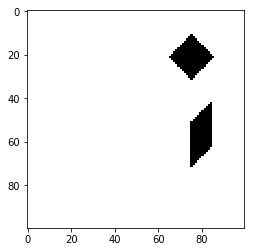

In [102]:
def DrawImageFromShapeInfo(shapeInfo, scale = 1):
    canvas = np.ones((100 * scale, 100 * scale, 3), np.uint8) * 255
    